In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
zipf = zipfile.ZipFile('/content/drive/MyDrive/faces.zip')
zipf.extractall()
zipf.close()

In [1]:
import pandas as pd
path = '/content/faces'
df = pd.read_csv(path+'/train.csv')
df

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE


In [2]:
from PIL import Image
from tqdm import tqdm
import numpy as np

In [3]:
df['Class'].value_counts()

,count
Class,
MIDDLE,10804
YOUNG,6706
OLD,2396


In [4]:
x_name = df['ID']
y_name= df['Class']
x=[]
y = []
for i in tqdm(range(len(x_name))):
  temp = Image.open('/content/faces/Train/'+x_name[i])
  temp = temp.resize((128,128))
  temp = np.array(temp)
  x.append(temp)
  if y_name[i] == 'MIDDLE':
    y.append(0)
  elif y_name[i] == 'YOUNG':
    y.append(1)
  else:
    y.append(2)


100%|██████████| 19906/19906 [00:20<00:00, 971.36it/s]


In [5]:
from tensorflow.keras.utils import to_categorical
x = np.asarray(x)
y = np.asarray(y)
y = to_categorical(y,num_classes=3)

In [6]:
print(x.shape , y.shape)

(19906, 128, 128, 3) (19906, 3)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=48)

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.regularizers import L1

In [10]:
model= Sequential()

In [11]:
model = Sequential()
model.add(Conv2D(128, [5,5], strides = [2,2], padding = 'same', input_shape=(128,128,3),kernel_regularizer=L1(0.01)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))


model.add(Conv2D(256, [5,5], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [1,1], padding = 'same'))
model.add(Conv2D(256, [3,3], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(512, [1,1], padding = 'same'))
model.add(Conv2D(512, [3,3], padding = 'same',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'same'))
model.add(Conv2D(512, [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(padding = 'same'))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
from tensorflow.keras.optimizers import Adam
from keras import optimizers
opt = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train,y_train,batch_size=100,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 267ms/step - acc: 0.4945 - loss: 3.1574 - val_acc: 0.5522 - val_loss: 2.4852
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 51s 175ms/step - acc: 0.5531 - loss: 2.3546 - val_acc: 0.6170 - val_loss: 1.9484
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 181ms/step - acc: 0.6145 - loss: 1.8370 - val_acc: 0.6698 - val_loss: 1.5609
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 175ms/step - acc: 0.6604 - loss: 1.5111 - val_acc: 0.6765 - val_loss: 1.3569
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 179ms/step - acc: 0.6781 - loss: 1.3349 - val_acc: 0.7049 - val_loss: 1.1994
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - acc: 0.6884 - loss: 1.1852 - val_acc: 0.7022 - val_loss: 1.1430
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 175ms/step - acc: 0.7045 - loss: 1.0671 - val_acc: 0.7293 - val_loss: 0.9828
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - acc: 0.7209 - loss: 0.9726 - val_acc: 0.7268 - val_loss: 0.9370
Epoch 9/50
160/160 ━━━━━━━━━━━━━

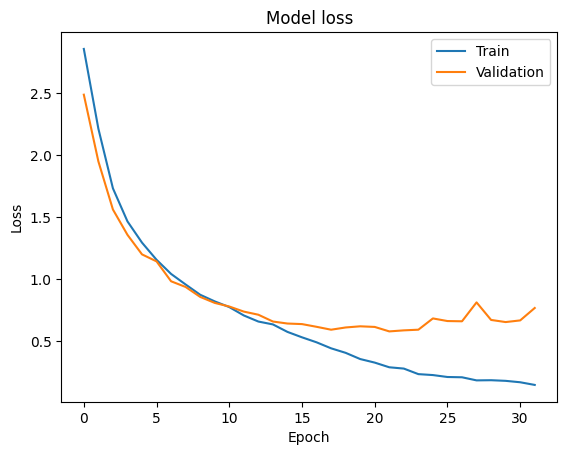

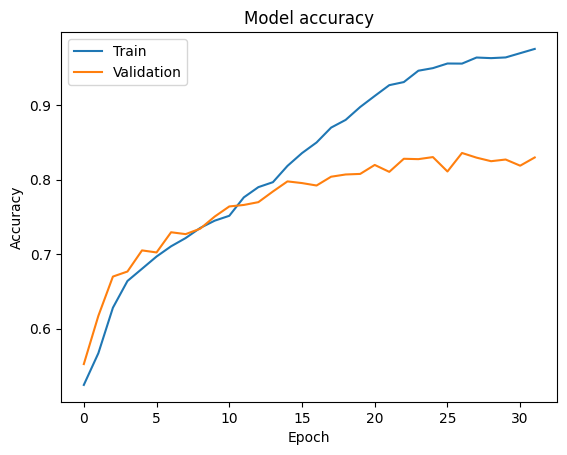

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step


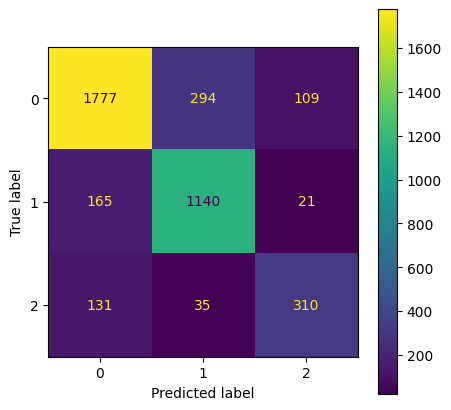

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax)
plt.show()
